In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import pickle as pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler

Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
numpy: 1.14.2
matplotlib: 2.1.2
pandas: 0.22.0


In [3]:
def pickle_data(filename, data):

    fileObject = open('PickleData/'+filename,'wb') 
    # this writes the object a to the
    # file named 'testfile'
    pickle.dump(data,fileObject) 

    # here we close the fileObject
    fileObject.close()
    
def load_pickle_data(filename):
    # we open the file for reading
    fileObject = open('PickleData/'+filename,'rb')  
    # load the object from the file into var b
    return pickle.load(fileObject)

In [4]:
# Read training set
df = pd.read_csv('Data/train.csv')

In [5]:
# Read test set
df_val = pd.read_csv('Data/validation.csv')

## Data Processing: Binary Dataset

#### Helper Functions

In [8]:
def preprocess_dataframe(x):
    
    # Drop unrequired features
    x = x.drop(['bidid','userid','IP','domain','url','urlid','slotid','slotprice','creative','bidprice','payprice','keypage'],axis=1)
    
    # Split user agent into two features, platform and browser
    x['platform'] = x['useragent'].map(lambda x: str(x).split('_')[0])   
    x['browser'] = x['useragent'].map(lambda x: str(x).split('_')[1])
    
    # Drop User Agent
    x = x.drop(['useragent'],axis=1)
    
    x = x.join(x['usertag'].str.get_dummies(','))
    
    # Drop User Tag
    x = x.drop(['usertag'],axis=1)
    
    x.loc[x['slotvisibility'] == 'FirstView', 'slotvisibility'] = 1
    x.loc[x['slotvisibility'] == 'SecondView', 'slotvisibility'] = 2
    x.loc[x['slotvisibility'] == 'ThirdView', 'slotvisibility'] = 3
    x.loc[x['slotvisibility'] == 'FourthView', 'slotvisibility'] = 4
    x.loc[x['slotvisibility'] == 'FifthView', 'slotvisibility'] = 5
    x.loc[x['slotvisibility'] == 'OtherView', 'slotvisibility'] = 6
    x.loc[x['slotvisibility'] == 'Na', 'slotvisibility'] = 0
    x.loc[x['slotvisibility'] == '255', 'slotvisibility'] = 255
    
    x['adexchange'].fillna(0,inplace=True)
    
    x = x.join(pd.get_dummies(x['weekday'],prefix='weekday'))
    x = x.join(pd.get_dummies(x['hour'],prefix='hour'))
    x = x.join(pd.get_dummies(x['region'],prefix='region'))
    x = x.join(pd.get_dummies(x['city'],prefix='city'))
    x = x.join(pd.get_dummies(x['adexchange'],prefix='adexchange'))
    x = x.join(pd.get_dummies(x['slotwidth'],prefix='slotwidth'))
    x = x.join(pd.get_dummies(x['slotheight'],prefix='slotheight'))
    x = x.join(pd.get_dummies(x['slotvisibility'],prefix='slotvisibility'))
    x = x.join(pd.get_dummies(x['slotformat'],prefix='slotformat'))
    x = x.join(pd.get_dummies(x['advertiser'],prefix='advertiser'))
    x = x.join(pd.get_dummies(x['platform'],prefix='platform'))
    x = x.join(pd.get_dummies(x['browser'],prefix='browser'))
    
    
    # Drop unrequired features
    x = x.drop(['weekday','hour','region','city','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','platform','browser'],axis=1)
    
    print('Data Preprocessed')

    return x
    

In [6]:
y = df_val['click']
x = df_val.drop(['click'], axis=1)

In [9]:
x = preprocess_dataframe(x)

Data Preprocessed


In [ ]:
#Pickle binary dataframe
pickle_data('binary_x_train',x)
#Pickle binary dataframe
pickle_data('binary_y_train',y)

In [9]:
x = load_pickle_data('binary_x_train')
y = load_pickle_data('binary_y_train')

In [10]:
x.head(5)

,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,...,platform_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0


## Option: Random Under Sample

In [11]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(x)

In [14]:
# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(x, y)
X_res_vis = pca.transform(X_resampled)

In [ ]:
#Pickle binary dataframe
pickle_data('binary_x_train_undersampled',X_resampled)
#Pickle binary dataframe
pickle_data('binary_y_train_undersampled',y_resampled)

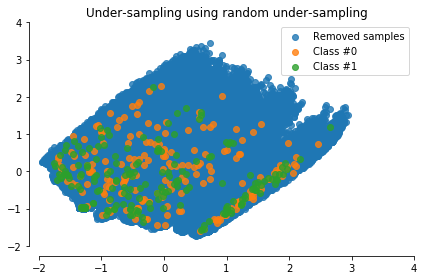

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')


# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])

plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()